## Загружаем модель, датасеты и семплируем таргеты

In [5]:
# для импорта из родительского каталога 
import os
import sys
import inspect

work_dir = r'C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work'
sys.path.insert(0, work_dir)
os.chdir(work_dir)
print(work_dir)

C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work


In [6]:
import pandas as pd
from load_model import MetricsModel

In [7]:
config_file= "./richgan\configs\simple.mc\gan_vs_kde.config.yaml"
chpt_dir =r"./saved_models"
m_model = MetricsModel(config_file, chpt_dir)
targets_data_dict = m_model.get_targets()

Loading main dataset
['RichDLLe', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLbt', 'Brunel_P', 'Brunel_ETA', 'nSPDhits', 'P_T', 'probe_sWeight']
[WindowsPath('dataset/train/muon_+_down_2018_MC_.csv'), WindowsPath('dataset/train/muon_+_up_2018_MC_.csv'), WindowsPath('dataset/train/muon_-_down_2018_MC_.csv'), WindowsPath('dataset/train/muon_-_up_2018_MC_.csv')]


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.33it/s]

Loading extra dataset


['RichDLLe', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLbt', 'P', 'ETA', 'NumSPDHits', 'P_T', 'probe_sWeight']
[WindowsPath('dataset/test/MC_mu_from_Bu_Kst_opposite.csv'), WindowsPath('dataset/test/MC_mu_from_Bu_Kst_same.csv')]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

['RichDLLe', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLbt', 'P', 'ETA', 'NumSPDHits']
[WindowsPath('dataset/test/MC_mu_from_Bu_Kst_opposite.csv'), WindowsPath('dataset/test/MC_mu_from_Bu_Kst_same.csv')]



  0%|                                                                                            | 0/2 [00:01<?, ?it/s]


Loading cp: saved_models/SimpleModelMuonMC/epoch-000099
Test dataset size: 117804


C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\kde_baseline\conditional_kde.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ids = np.array(new_ids_list)
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\kde_baseline\conditional_kde.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dists = np.array(new_dists_list)
100%|███████████████████████████████████████████████████████████████████████| 117804/117804 [00:03<00:00, 35929.49it/s]


Applying selection: (gen_RichDLLe > -800) & (gen_RichDLLmu > -800) & (gen_RichDLLk > -800) & (gen_RichDLLp > -800) & (gen_RichDLLbt > -800) & (RichDLLe > -800) & (RichDLLmu > -800) & (RichDLLk > -800) & (RichDLLp > -800) & (RichDLLbt > -800) & (gen2_RichDLLe > -800) & (gen2_RichDLLmu > -800) & (gen2_RichDLLk > -800) & (gen2_RichDLLp > -800) & (gen2_RichDLLbt > -800)
Selection keeps 98.56032053240976% of events


In [8]:
targets_data_dict.keys()

dict_keys(['features', 'targets_real', 'weights', 'targets_fake_kde', 'targets_fake_gan'])

### Признаки

In [9]:
# при обучении используется только: 
# Brunel_P, Brunel_ETA, nSPDhits
targets_data_dict['features']

,Brunel_P,Brunel_ETA,nSPDhits,P_T
0,74425.003364,3.253074,381.0,5745.240567
1,55834.455535,4.159080,67.0,1744.057591
2,43739.995332,4.065698,155.0,1499.930003
3,3915.575470,2.598581,192.0,579.268903
4,19980.156187,3.673161,191.0,1014.180398
...,...,...,...,...
117799,7725.676306,2.128879,334.0,1812.601386
117800,20253.863483,3.524043,108.0,1193.130621
117801,12637.023256,3.472980,342.0,783.358779
117802,11066.660517,2.292457,113.0,2213.276106


## Рисуем промежуточные графики 

In [10]:
%matplotlib inline

from plot_targets import plot_Hist1D

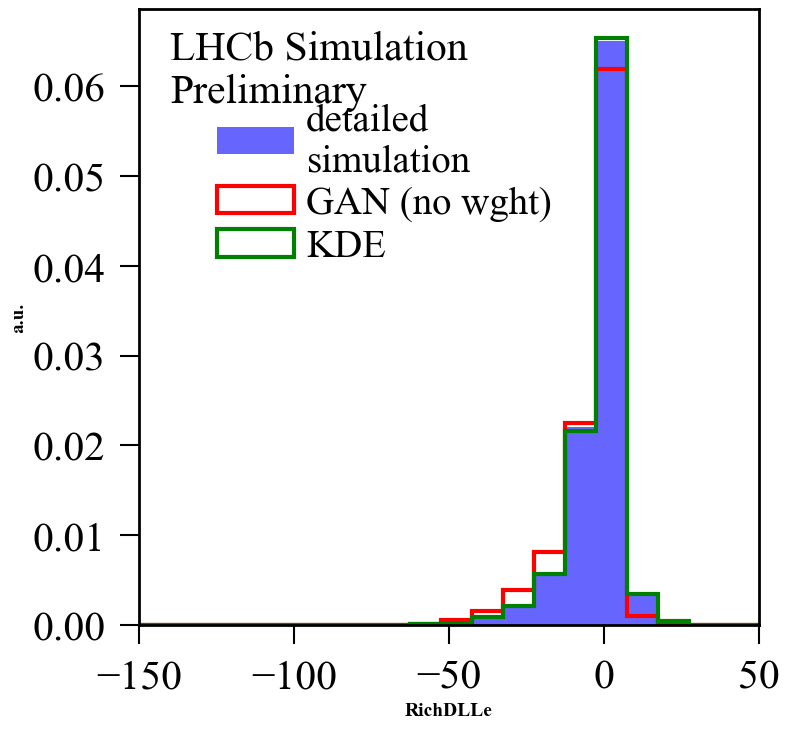

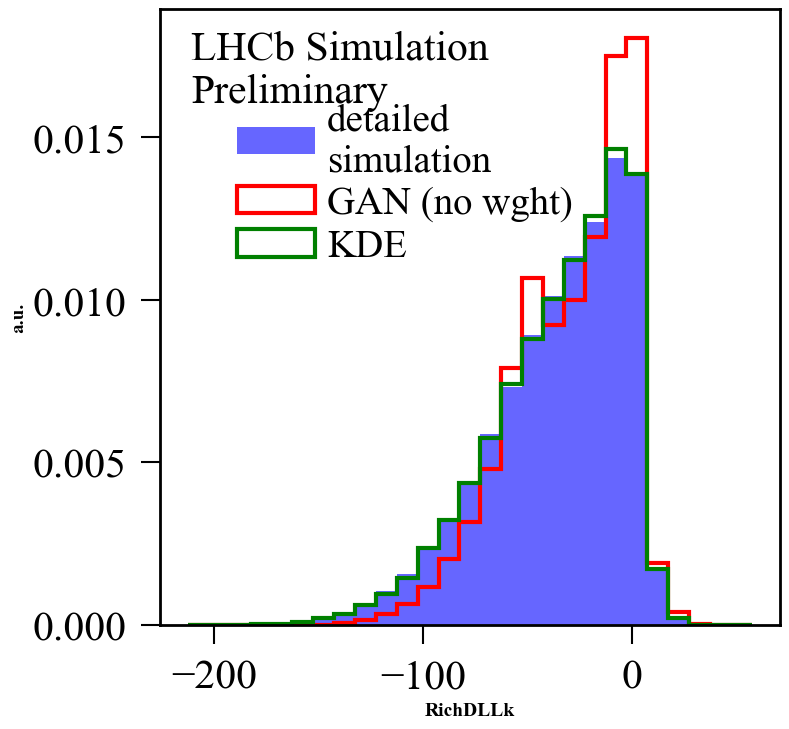

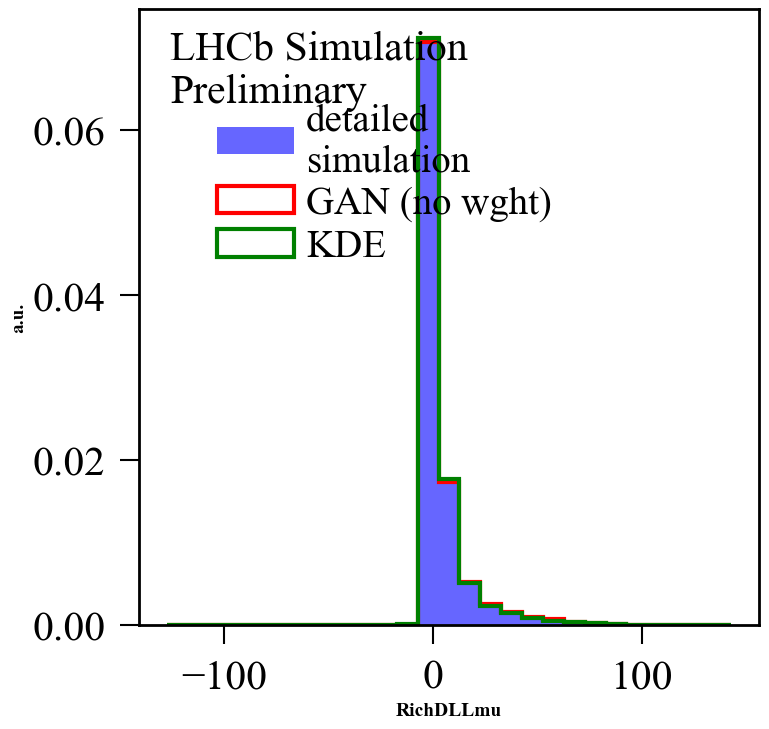

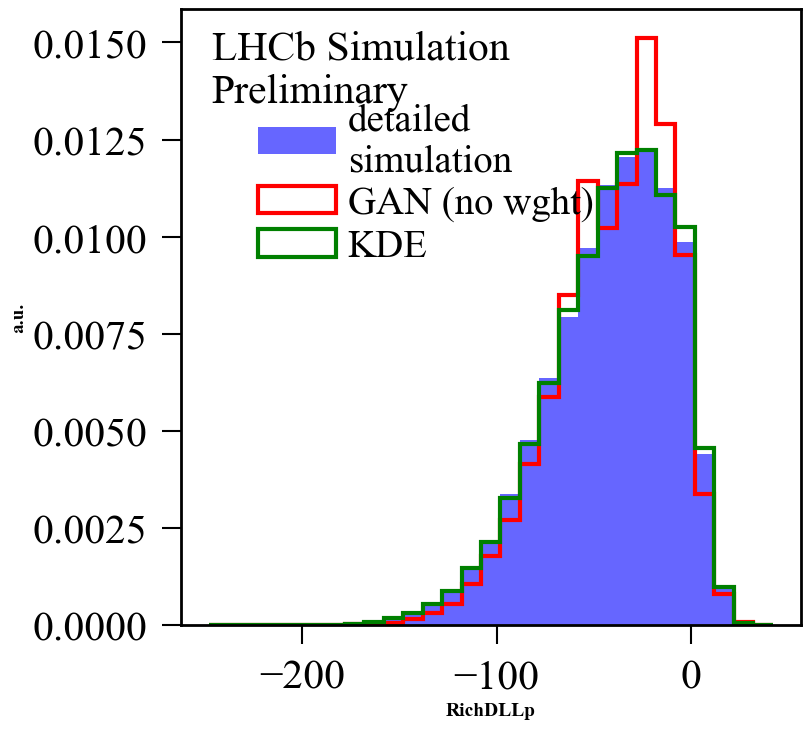

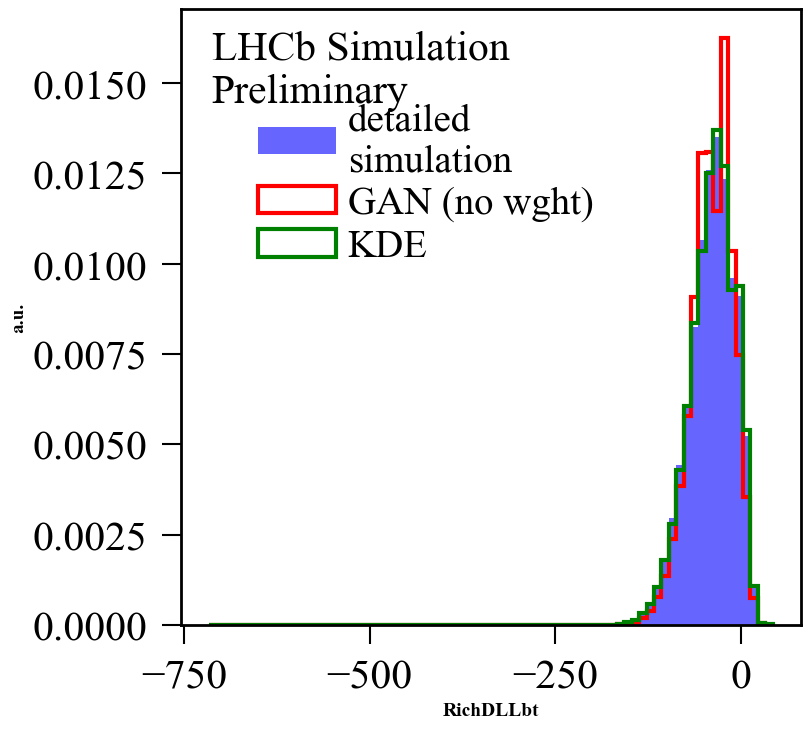

In [11]:
dll_list = plot_Hist1D(targets_data_dict['features'],
                targets_data_dict['targets_real'],
                targets_data_dict['targets_fake_gan'],
                targets_data_dict['targets_fake_kde'],
                targets_data_dict['weights'],
                model_name='GAN (no wght)', model_name2='KDE')

### Эффектировности удобные для просмотра 

In [12]:
from plot_efficiency import plot_EfficiencyDouble

In [13]:
# чтобы удобнее смотреть, нужно отобрать только немного эффективностей
thresholds = [[0.95], [0.05], [0.95], [0.05]]

In [14]:
efficiency_dict = plot_EfficiencyDouble(targets_data_dict['features'],
                                         targets_data_dict['targets_real'],
                                         targets_data_dict['targets_fake_gan'],
                                         targets_data_dict['targets_fake_kde'],
                                         targets_data_dict['weights'],
                                         thresholds = thresholds,
                                         model_names=['GAN  (no wght)', 'KDE'])

C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:308: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:330: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:359: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axhline(y=0, color='black', linestyle='-')
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:308: UserWarning: marker is redundantly defined by the 'marker' keyword argument a

C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:308: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:330: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:344: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ymin, ymax = plt.gca().get_ylim()
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:359: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear.

C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:308: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:330: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:344: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ymin, ymax = plt.gca().get_ylim()
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:359: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear.

C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:308: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:330: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:344: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ymin, ymax = plt.gca().get_ylim()
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:359: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear.

C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:308: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:330: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:344: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ymin, ymax = plt.gca().get_ylim()
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:359: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear.

C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:308: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:330: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:344: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ymin, ymax = plt.gca().get_ylim()
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:359: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear.

C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:308: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:330: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:344: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ymin, ymax = plt.gca().get_ylim()
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:359: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear.

C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:308: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:330: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:344: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ymin, ymax = plt.gca().get_ylim()
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:359: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear.

C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:308: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:330: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:344: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ymin, ymax = plt.gca().get_ylim()
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:359: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear.

C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:308: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:330: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:344: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ymin, ymax = plt.gca().get_ylim()
C:\Users\Sergey\Sources\Projects\rich-gan-tf-2021_work\baseline_metrics\plot_efficiency.py:359: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear.

### Эффективности нужные для итоговых метрик 

In [ ]:
# нужно взять все эффетивности 
thresholds = [[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95],
            [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95],
            [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95],
            [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]]

In [ ]:
efficiency_dict = plot_EfficiencyDouble(targets_data_dict['features'],
                                         targets_data_dict['targets_real'],
                                         targets_data_dict['targets_fake_gan'],
                                         targets_data_dict['targets_fake_kde'],
                                         targets_data_dict['weights'],
                                         thresholds = thresholds,
                                         model_names=['GAN  (no wght)', 'KDE'])

In [ ]:
efficiency_dict['EfficiencyMaker:1']['GAN']['eff_ratio_RichDLLe_vs_Brunel_P_at_[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]']

## Итоговые метрики

In [ ]:
from math import sqrt

In [ ]:
# вычисляем расстояние по идее Артема
def calculate_dist(bins):
    dis_sum = 0
    for bin_x in bins.iterrows():
        eff_ratio = bin_x[1][0]
        err_low = bin_x[1][1]
        err_high = bin_x[1][2]
        if eff_ratio <= 1:
            dist = ((1-eff_ratio)/err_high)**2
        else:
            dist = ((1-eff_ratio)/err_low)**2
        dis_sum += dist
    return dis_sum

In [ ]:
# если брать корень в самом конце
def dis_for_model(raw_output_dict, model_name, percents):
    dis_sum = 0
    for eff_name in list(raw_output_dict['EfficiencyMaker:1'][model_name]):
        # чтобы не было слишком сильной корреляции
        if '_reverse' in eff_name or '_P_T_' in eff_name:
            continue
        all_percent_dist = 0
        for percent in percents:
            eff_ratio_column = 'eff_ratio_' + str(percent)
            eff_ratio_err_low_column = 'eff_ratio_err_low_' + str(percent)
            eff_ratio_err_high_column = 'eff_ratio_err_high_' + str(percent)
            bins = raw_output_dict['EfficiencyMaker:1'][model_name][eff_name][[eff_ratio_column,
                                                                               eff_ratio_err_low_column,
                                                                               eff_ratio_err_high_column]]
            percent_dist = calculate_dist(bins)
            # складываем для всех процентов
            all_percent_dist += percent_dist

        dis_sum += all_percent_dist
    return sqrt(dis_sum)

In [ ]:
# Если брать корень после каждого графика
def dis_for_model_end(raw_output_dict, model_name, percents):
    dis_sum = 0
    for eff_name in list(raw_output_dict['EfficiencyMaker:1'][model_name]):
        # чтобы не было слишком сильной корреляции
        if '_reverse' in eff_name or '_P_T_' in eff_name:
            continue
        all_percent_dist = 0
        for percent in percents:
            eff_ratio_column = 'eff_ratio_'+str(percent)
            eff_ratio_err_low_column = 'eff_ratio_err_low_'+str(percent)
            eff_ratio_err_high_column = 'eff_ratio_err_high_'+str(percent)
            bins = raw_output_dict['EfficiencyMaker:1'][model_name][eff_name][[eff_ratio_column,
                                                                               eff_ratio_err_low_column,
                                                                               eff_ratio_err_high_column]]
            percent_dist = calculate_dist(bins)
            # складываем для всех процентов
            all_percent_dist += percent_dist

        dis_sum += sqrt(all_percent_dist)
    return dis_sum


In [ ]:
def compare_metrics(efficiency_dict):
    percents_list = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
    dist_list = {'GAN': [], 'KDE': []}
    for percent in percents_list:
        dis_sum = dis_for_model(raw_output_dict = efficiency_dict, model_name='GAN', percents=[percent])
        dist_list['GAN'].append(dis_sum)
        dis_sum = dis_for_model(raw_output_dict = efficiency_dict, model_name='KDE', percents=[percent])
        dist_list['KDE'].append(dis_sum)

    print('Берем корень в самом конце:')
    print('GAN:', dist_list['GAN'][-1])
    print('KDE:', dist_list['KDE'][-1])

    dist_list2 = {'GAN': [], 'KDE': []}
    for percent in percents_list:
        dis_sum = dis_for_model_end(raw_output_dict = efficiency_dict, model_name='GAN', percents=[percent])
        dist_list2['GAN'].append(dis_sum)
        dis_sum = dis_for_model_end(raw_output_dict = efficiency_dict, model_name='KDE', percents=[percent])
        dist_list2['KDE'].append(dis_sum)

    print('Берем корень в после каждого графика:')
    print('GAN:', dist_list2['GAN'][-1])
    print('KDE:', dist_list2['KDE'][-1])
    return  dist_list, dist_list2

In [ ]:
dist_list, dist_list2 = compare_metrics(efficiency_dict)